## Problem Statement:
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute.Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market. The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

## Data Dictionary

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered3

### Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN, nan, NAN
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
bike_data=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [3]:
bike_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [4]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
bike_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
# Converting timestamp object into timestamp64[ns] for finding useful insights
bike_data['datetime'] = bike_data['datetime'].astype('datetime64[ns]')

In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
bike_data.shape

(10886, 12)

In [9]:
bike_data.isnull().sum()/len(bike_data) * 100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

In [10]:
bike_data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [14]:
bike_data.duplicated().sum()

0

**Observations:** 
- There are total 4 categorical features namely Season, is_holiday, is_weekend, weather_code and 7 numerical/continuos features and 1 datatime object. In total 12 independent features with 10886 rows.
- Missing data or Null values are not present , neither any duplicated row is there.

## Outlier Detection & Removal:

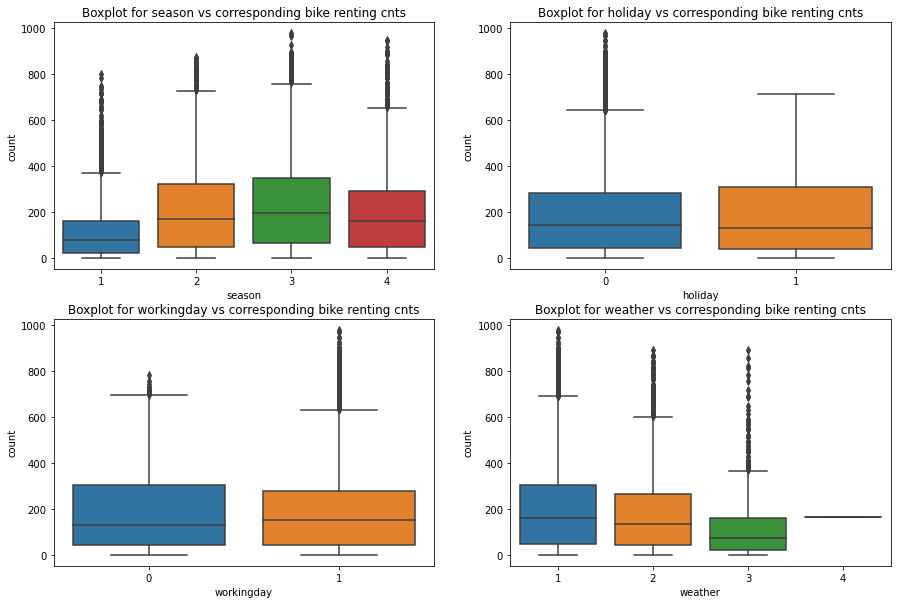

In [12]:
# Visualization before outlier removal
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.boxplot(x = 'season', y = 'count', data = bike_data)
ax1.set_title('Boxplot for season vs corresponding bike renting cnts')

ax1 = fig.add_subplot(222)
sns.boxplot(x = 'holiday', y = 'count', data = bike_data)
ax1.set_title('Boxplot for holiday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(223)
sns.boxplot(x = 'workingday', y = 'count', data = bike_data)
ax1.set_title('Boxplot for workingday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.boxplot(x = 'weather', y = 'count', data = bike_data)
ax1.set_title('Boxplot for weather vs corresponding bike renting cnts')

plt.show()

In [14]:
bike_dcopy = bike_data.copy() # Taken backup of orginial dataset before removing outliersxx

In [15]:
q1=bike_data['count'].quantile(0.25)
q3=bike_data['count'].quantile(0.75)
iqr=q3-q1
bike_data = bike_data[(bike_data['count'] >= q1 - 1.5*iqr) & (bike_data['count'] <= q3 +1.5*iqr)]
bike_data.shape

(10586, 12)

In [17]:
bike_dcopy.shape[0] - bike_data.shape[0]

300

# Univariate Analysis and Bivariate Analysis:

**timestamp specific EDA:**

As we will be finding some useful insights w.r.t the timeseries data, we will be working on the original dataset before removing outliers which is **bike_dcopy**

In [18]:
bike_datatime=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [24]:
bike_dcopy.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'Year', 'Month', 'Day'],
      dtype='object')

In [25]:
bike_dcopy["datetime"].sort_values() 

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [26]:
bike_dcopy['Year'] = bike_dcopy['datetime'].dt.year
bike_dcopy['Month'] = bike_dcopy['datetime'].dt.month
bike_dcopy['Day'] = bike_dcopy['datetime'].dt.day
bike_dcopy

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19


In [30]:
bike_dcopy['year'] = bike_dcopy['datetime'].dt.year

In [31]:
bike_dcopy['month'] = bike_dcopy['datetime'].dt.month

In [28]:
bike_dcopy.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1


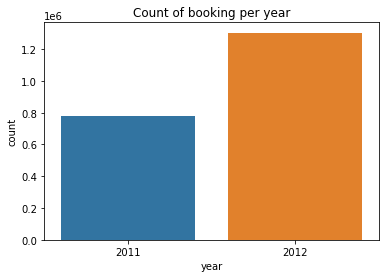

In [32]:
year_data = bike_dcopy.groupby(['year'])['count'].sum()
year_data = year_data.reset_index()
sns.barplot(x='year',y='count',data=year_data)
plt.title('Count of booking per year')
plt.show()

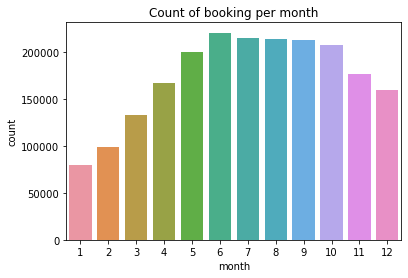

In [33]:
month_data = bike_dcopy.groupby(['month'])['count'].sum()
month_data = month_data.reset_index()
sns.barplot(x='month',y='count',data=month_data)
plt.title('Count of booking per month')
plt.show()

In [34]:
mon_year_data = bike_dcopy.groupby(['year','month'])['count'].sum()
mon_year_data = pd.DataFrame(mon_year_data)
mon_year_data.reset_index(inplace = True)
myy = mon_year_data.pivot('month','year','count').fillna(0)

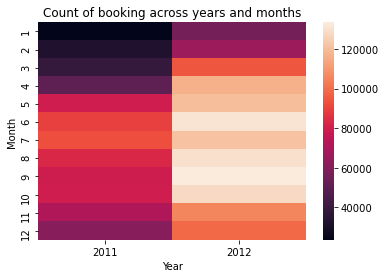

In [35]:
sns.heatmap(myy)
plt.title('Count of booking across years and months')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

As infered earlier the data booking is almost same across all the months.

**Observations:** 
- As the data ranges from 1st Jan 2011 to 19th Dec 2012, the cnt of the bikes rented will also be in this time period of almost 2 years.
- During months of September and October, maximum number of  bikes are rented.
- The cnt is less in the cold seasons of winter(Months such as Nov, Dec, Jan, Feb) where due to cold, people prefer mostly not to ride the bikes.
- As we can see, the data contains dates from 1 to 19th of a particular month.
- As we can from the monthwose bar plot , the demand for  bikes at the starting months is quite low as compared to months from March 2012 onwards. There's adrop in the middle owing to cold and winter season.
- Booking from 2017 is nearly zero so far.
- Almost all the months have same number of bookings.


In [44]:
#Univariate analysis for numerical/continuos variables
def num_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(6,3))
    sns.histplot(col_data, kde=True, ax=ax[0], color = 'purple')
    ax[0].axvline(col_data.mean(), color='r', linestyle='--',linewidth=2)
    ax[0].axvline(col_data.median(), color='k', linestyle='dashed', linewidth=2)
    ax[0].axvline(col_data.mode()[0],color='y',linestyle='solid',linewidth=2)
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [45]:
num_cols = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

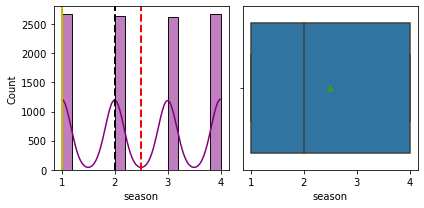

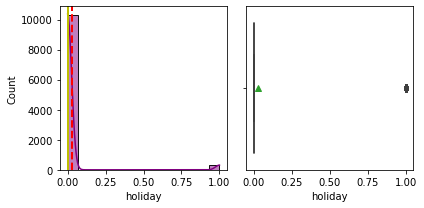

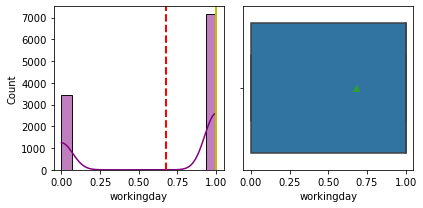

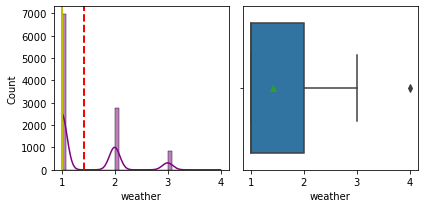

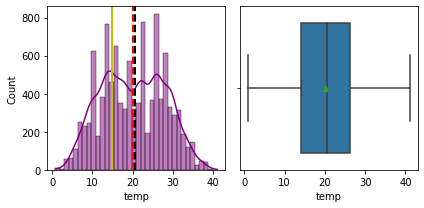

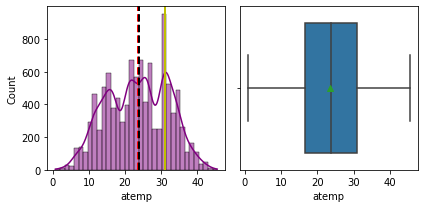

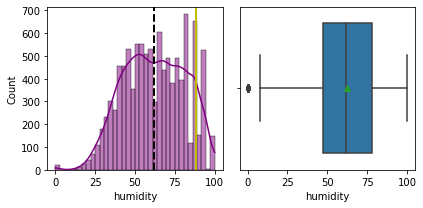

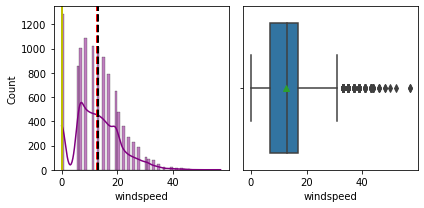

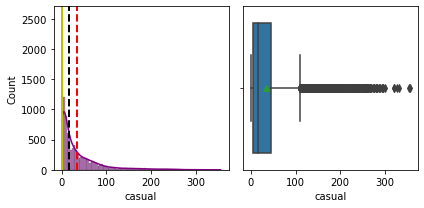

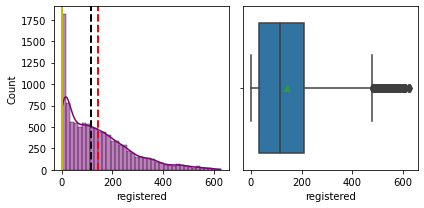

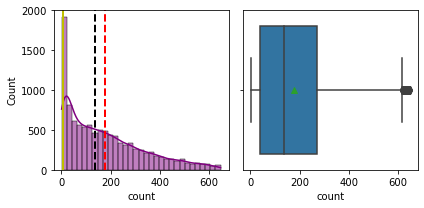

In [46]:
for i in num_cols:
    num_feat(bike_data[i])

**Observations for univariate features:**
- For weather, 10th and 26th  (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) no. of users renting bikes is much low and hence it's good to drop the feature while doing further tests.
- cnt for bikes rentied in working day is much higher than non working day.
- During holidays, people don't prefer to ride bikes.
- When the weather is Clear with Few clouds, people tend to rent more  bikes for their comute.
- During the spring, summer, fall, winter, the cnt is more or less equal for the users renting bikes
- There are outliers in windspeed and casual users which tells us that, the windspeed in not uniform. 
- The exponentil decay curve for the cnt tells that, as the users renting bikes increases, the frequency decreases.

**Corelation between Bivariate features:**


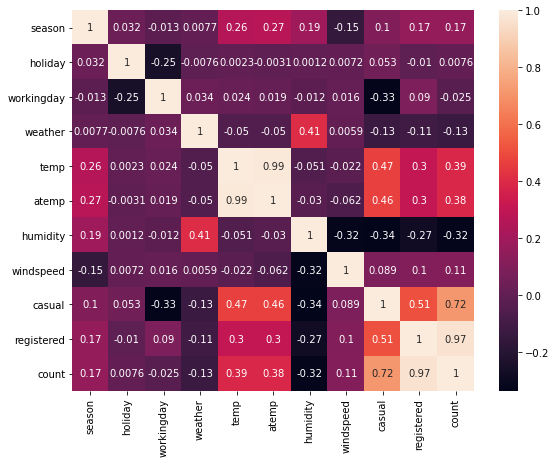

In [47]:
plt.figure(figsize = (9, 7))
sns.heatmap(bike_data.corr(),annot=True)
plt.show()

**Observations:**:
- The **registered user** cnt has higher corelation with the cnt as compared to the **casual user cnt**.
- The **windspeed and season** has a very low(near zero) positive corelation with the cnt which means, the windspeed and seasons doesn't have an effect in the demand of  bikes rented.
- The **t1erature and user specific feeling of heat/cold** has a moderated corelation (0.3) with the cnt. People tends to go ot in bright sunny day whne the t1 is normal whereas as during hrsh conditions such as too hot or too cold, the demand in the  bikes has seen a considerable dip.
- The casual users who rents  bikes likes to ride the bikes as the t1erature is suitable.
- When there's a is_holiday, user cnt has seen a considerable dip whereas in working days, the cnt is normal.

# Two - Sample T-Test

**2- Sample T-Test to check if Holiday has an effect on the number of electric cycles rented**

#### Step 1: Define Null & Alternate Hypothesis

Setting up Null Hypothesis (H0) and Stating the alternate hypothesis (Ha) and significance level
- **H0 : The bike's renting cnt in working days and non- working days are equal.**
- **Ha : The bike's renting cnt in working days and non- working days is not equal.**
- alpha = 0.05

#### Step 2: Validate the assumptions
**Two-sample t-test assumptions**
- Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
- Data in each group must be obtained via a random sample from the population.
- Data in each group are normally distributed.
- Data values are continuous.
- The variances for the two independent groups are equal.

In [48]:
bike_data.shape

(10586, 12)

In [49]:
bike_data['workingday'].value_counts(normalize = True) * 100

1    67.645947
0    32.354053
Name: workingday, dtype: float64

In [50]:
bike_data['workingday'].value_counts()

1    7161
0    3425
Name: workingday, dtype: int64

**to keep the power of the test it is imp to keep the sample sizes equal**

In [51]:

working_data = bike_data[bike_data['workingday'] == 1].sample(2500, replace = True)
non_working_data = bike_data[bike_data['workingday'] == 0].sample(2500, replace = True)


**Checking assumptions of the test (Normality, Equal Variance)**
- Using visualization methods - Histogram, Q-Q plot
- Using statistical methods like levene’s test, Shapiro-wilk test

In [66]:
round(working_data['count'].std()**2,2), round(non_working_data['count'].std()**2 ,2)

(22500.28, 26906.89)

**Observations**: The variance is not equal for both the samples.

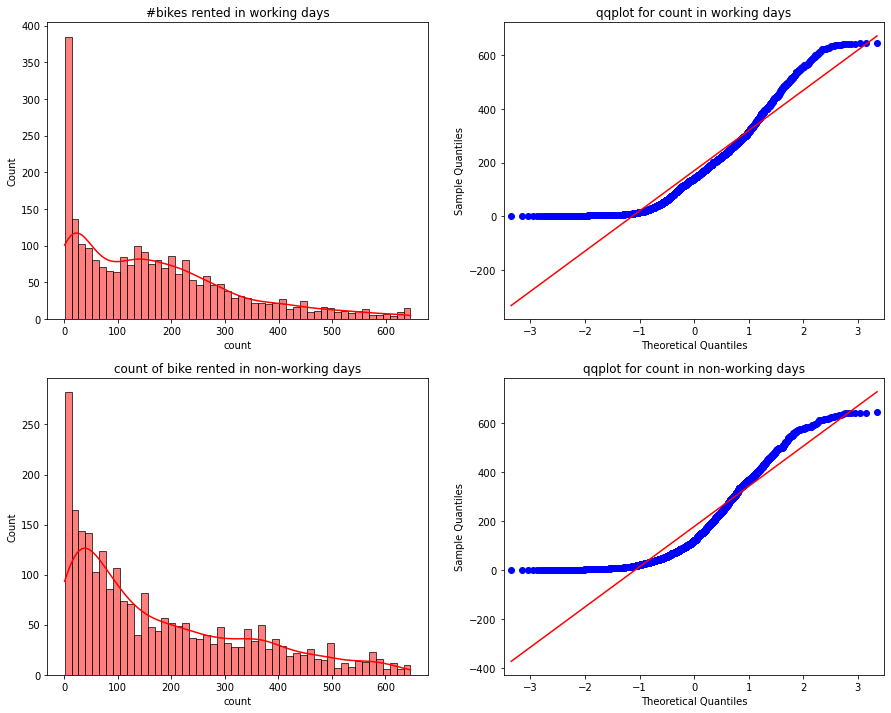

In [62]:
#Checking the normality
fig = plt.figure(figsize = (15,12))

ax1 = fig.add_subplot(221)
sns.histplot(data = working_data, x = 'count' , bins = 50, kde = True, ax = ax1, color = 'red')
ax1.set_title('#bikes rented in working days')

ax2 = fig.add_subplot(222)
sm.qqplot(working_data['count'], line = 's', ax = ax2)
ax2.set_title('qqplot for count in working days')

ax3 = fig.add_subplot(223)
sns.histplot(data = non_working_data, x = 'count' , bins = 50, kde = True, ax = ax3, color = 'red')
ax3.set_title('count of bike rented in non-working days')

ax4 = fig.add_subplot(224)
sm.qqplot(non_working_data['count'], line = 's', ax = ax4)
ax4.set_title('qqplot for count in non-working days')

plt.show()

In [63]:
# Calculating the p-value and test- statistics usinging ttest_ind() for this right skwed distribution sample.
# Alternative == greater as it's right skewed and one-sided
t_test, p_value = stats.ttest_ind(working_data['count'],non_working_data['count'],
                                  alternative='greater', equal_var = False)
t_test, p_value

(-1.9721315903459762, 0.975674963162703)

**Observations**: 
- The distribution of the population samples is right-skwed and it's not normal which violates is our assumption for conducting 2 sample t test. Also the varaince of the samples is unequal.Hence we will do log-transformation
- We got a p-value of 0.99 which is greater than 0.05 and hence we can say that we fail to reject null hypothesis. We will confirm after log - transformation as well

**Applying log on the data - Log Normal Distribution**

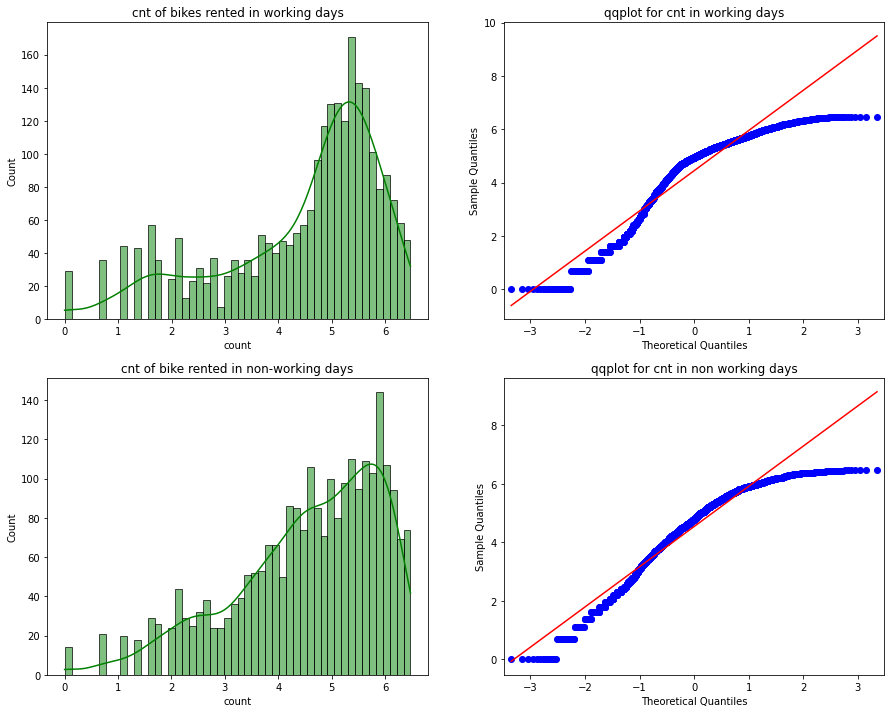

In [64]:
fig = plt.figure(figsize = (15,12))

ax1 = fig.add_subplot(221)
sns.histplot(data = np.log(working_data['count']) , bins = 50, kde = True, ax = ax1, color = 'green')
ax1.set_title('cnt of bikes rented in working days')

ax2 = fig.add_subplot(222)
sm.qqplot(np.log(working_data['count']), line = 's', ax = ax2)
ax2.set_title('qqplot for cnt in working days')

ax3 = fig.add_subplot(223)
sns.histplot(data = np.log(non_working_data['count']) , bins = 50, kde = True, ax = ax3, color  = 'green')
ax3.set_title('cnt of bike rented in non-working days')

ax4 = fig.add_subplot(224)
sm.qqplot(np.log(non_working_data['count']), line = 's', ax = ax4)
ax4.set_title('qqplot for cnt in non working days')

plt.show()

In [67]:
round(np.log(working_data['count']).std()**2,2), round(np.log(non_working_data['count']).std()**2 ,2)

(2.27, 1.89)

**Observations**: After taking log on the sample population:
- we dont really get a near normal distribution with variance somewhat different from each other. Still we can calculate the p-value and test-statistics, as asked in the question pallette!

In [72]:
sample_w_log = np.log(working_data['count']).sample(2500)
sample_nw_log = np.log(non_working_data['count']).sample(2500)

statistic,p_value = stats.ttest_ind(sample_w_log,sample_nw_log , alternative = 'greater')
statistic,p_value

def htResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('Fail to Reject NULL HYPOTHESIS') 

In [77]:
htResult(p_value)

Fail to Reject NULL HYPOTHESIS


In [75]:
stats.levene(sample_w_log, sample_nw_log, center='median')

LeveneResult(statistic=1.8965794313551154, pvalue=0.16852336289968312)

**Conclusion : As the p value > alpha(0.05) , we fail to reject H0 and thus we can say that the cnt of renting of  bikes in both working and non-working days is equal. And we can confirm this using the boxplot as well**

# Chi-square test to check if weather is dependent on the season 

Assumptions:
- Assumption 1: Both variables are categorical.
- Assumption 2: All observations are independent.
- Assumption 3: Cells in the contingency table are mutually exclusive.
- Assumption 4: Expected value of cells should be 5 or greater in at least 80% of cells.
    - It’s assumed that the expected value of cells in the contingency table should be 5 or greater in at least 80% of cells and that no cell should have an expected value less than 1.

**H0 : Both weather_code and seasons are independent of each other**

**Ha : There is dependency of weather_code on Seasons**

aplha = 0.05

In [78]:
contigency_table = pd.crosstab(bike_data.weather,bike_data.season,margins=True,margins_name='Total')
contigency_table

season,1,2,3,4,Total
weather,,,,,
1,1744,1721,1843,1657,6965
2,714,690,579,787,2770
3,211,223,195,221,850
4,1,0,0,0,1
Total,2670,2634,2617,2665,10586


In [80]:
contigency_table = contigency_table.rename(columns = {'Total':'Row_total'})
contigency_table

season,1,2,3,4,Row_total
weather,,,,,
1,1744,1721,1843,1657,6965
2,714,690,579,787,2770
3,211,223,195,221,850
4,1,0,0,0,1
Total,2670,2634,2617,2665,10586


A Chi-Square Test of Independence
- As we doing independence test for 2 categorical vaiarbles we are using Chi-squared test.

- Expected value of cells should be 5 or greater in at least 80% of cells & that no cell should have an expected value less than 1.
- We can use the following formula to calculate the expected values for each cell in the contingency table:
- Expected value = (row sum * column sum) / table sum.

In [81]:
n = contigency_table.at["Total", "Row_total"]
exp=contigency_table.copy()
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        v= (((contigency_table.at[x, "Row_total"]) * (contigency_table.at["Total", y]))/n ).round(2)
        exp.at[x,y]=float(v)

exp = exp.iloc[[0, 1, 2, 3, 4 ], [0, 1, 2, 3]]
exp

season,1,2,3,4
weather,,,,
1,1756,1733,1721,1753
2,698,689,684,697
3,214,211,210,213
4,0,0,0,0
Total,2670,2634,2617,2665


#### Weather 4 has expeted counts less than 5, so we will drop it.

In [86]:
bike_data['weather'].value_counts()

1    6965
2    2770
3     850
Name: weather, dtype: int64

In [83]:
bike_data['season'].value_counts()

1    2670
4    2665
2    2634
3    2617
Name: season, dtype: int64

In [87]:
bike_data=bike_data[~(bike_data['weather']==4)]
bike_data['weather'].value_counts()

1    6965
2    2770
3     850
Name: weather, dtype: int64

In [88]:
contigency_table = pd.crosstab(bike_data.weather,bike_data.season,margins=True,margins_name='Total')
contigency_table

season,1,2,3,4,Total
weather,,,,,
1,1744,1721,1843,1657,6965
2,714,690,579,787,2770
3,211,223,195,221,850
Total,2669,2634,2617,2665,10585


In [90]:
contigency_table = contigency_table.rename(columns = {'Total':'Row_total'})
contigency_table

season,1,2,3,4,Row_total
weather,,,,,
1,1744,1721,1843,1657,6965
2,714,690,579,787,2770
3,211,223,195,221,850
Total,2669,2634,2617,2665,10585


In [92]:
n = contigency_table.at["Total", "Row_total"]
exp=contigency_table.copy()
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        v= (((contigency_table.at[x, "Row_total"]) * (contigency_table.at["Total", y]))/n ).round(2)
        exp.at[x,y]=float(v)

exp = exp.iloc[[0, 1, 2, 3], [0, 1,2,3]]
exp

season,1,2,3,4
weather,,,,
1,1756,1733,1722,1753
2,698,689,684,697
3,214,211,210,214
Total,2669,2634,2617,2665


#### No Weather  has expeted counts less than 5, so we will continue with Chi Sqaure test

In [93]:
weather_code_season_dep = pd.crosstab(bike_data['weather'], bike_data['season'])
weather_code_season_dep

season,1,2,3,4
weather,,,,
1,1744,1721,1843,1657
2,714,690,579,787
3,211,223,195,221


In [94]:
stat, p_value, dof, expected = stats.chi2_contingency(weather_code_season_dep)
stat, p_value, dof, expected

(44.20402460567892,
 6.734426550686341e-08,
 6,
 array([[1756.21965045, 1733.18941899, 1722.00330657, 1753.587624  ],
        [ 698.45347189,  689.29428436,  684.84553614,  697.40670761],
        [ 214.32687766,  211.51629665,  210.1511573 ,  214.0056684 ]]))

In [95]:
alpha = 0.05
if p_value >= alpha: 
    print('We fail to reject the Null Hypothesis Ho and thus we can conclude that smokers proportion is not significantly different in different regions"')
else:
    print('We reject the Null Hypothesis Ho')

We reject the Null Hypothesis Ho


**p- value (6.734426550686341e-08) < alpha(0.05) --> so we can reject H0**
- Which means Both weather and seasons are not independent of each other

**We can conclude that we can reject the H0 as we have enough evidence to reject the null hypothesis, so it seems like weather and Seasons are dependent on each other**

# ANNOVA to check if no. of cycles rented is similar or different in different weather_code and season

**Assumptions:**
- Normality – that each sample is taken from a normally distributed population
- Sample independence – that each sample has been drawn independently of the other samples
- Variance equality – that the variance of data in the different groups should be the same
- Your dependent variable – here, “cnt”, should be continuous – that is, measured on a scale which can be subdivided using increments

**1. weather**

**H0 (Null Hupothesis) :** count of bikes rented is same in diffrent types of weather

**Ha (Alternate Hupothesis) :** count of bikes rented is different in diffrent types of weather

**alpha: 0.05**

In [96]:
bike_dcopy['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

**Checking assumptions of the test (Normality, Equal Variance)**

In [97]:
from scipy.stats import shapiro
def normality_check(series, alpha=0.05):
    _, p_value = shapiro(series)
    print(f'p value = {p_value}')
    if p_value >= alpha:
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

<AxesSubplot:xlabel='count', ylabel='Count'>

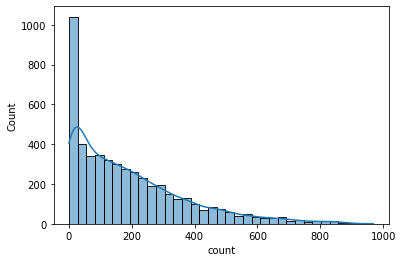

In [98]:
sns.histplot(bike_dcopy['count'].sample(5000), kde = True)

<AxesSubplot:xlabel='count', ylabel='Count'>

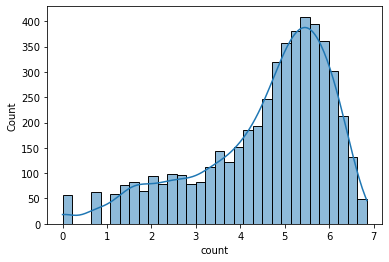

In [99]:
#Taking the log of the above distribution sample as it's not normal.
sns.histplot(np.log(bike_dcopy['count'].sample(5000)), kde = True)

In [100]:
# H0: Series is Normal
# Ha : Series is not Normal
# alpha  = 0.05
stats.shapiro(bike_dcopy['count'].sample(5000))

ShapiroResult(statistic=0.882299542427063, pvalue=0.0)

**Observations:** Even after taking log, the distribution is not exactly normal. So our assumption doesn't holds true. Also, we have confirmed with the statistical test -Shapiro wik test that the series is not normal.Still we will be going ahead with the test just to check the results.

In [102]:
bike_dcopy['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

#### Normality Test:
We will perform normality check using **Shapiro test.**

The hypothesis of this test are:
- Ho: series is normal
- Ha: series is not normal

In [103]:
normality_check(bike_dcopy['weather'].sample(1400, replace = True))

p value = 2.802596928649634e-45
We reject the Null Hypothesis Ho


#### Equality of Variance Test:
We will perform equivalence check for using using Levene's test.

The hypothesis of this test are:
- Ho: Variances are equal
- Ha: Variances are not equal

In [104]:
bike_dcopy.groupby(['weather'])['count'].describe() # Variance is different for diff weather_code

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [113]:
from scipy.stats import levene
def variance_check(series1, series2, series3,series4, alpha=0.05):
    _, p_value = levene(series1, series2, series3)
    print(f'p value = {p_value}')
    if (p_value >= alpha).all():
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

In [114]:
series1 =   bike_dcopy[bike_dcopy['weather'] == 1]['count'].sample(500,replace=True)
series2 =       bike_dcopy[bike_dcopy['weather'] == 2]['count'].sample(500,replace=True)
series3 =          bike_dcopy[bike_dcopy['weather'] == 3]['count'].sample(500,replace=True)
series4 =       bike_dcopy[bike_dcopy['weather'] == 4]['count'].sample(500,replace=True)

In [115]:
variance_check(series1, series2, series3,series4)

p value = 1.8550748632061074e-07
We reject the Null Hypothesis Ho


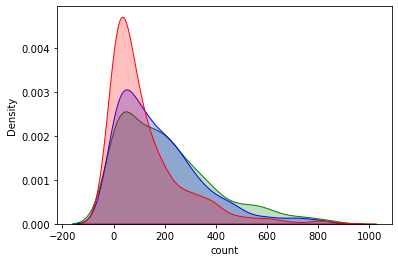

In [116]:
sns.kdeplot(series1,color = 'green',shade='green')
sns.kdeplot(series2,color = 'blue',shade = 'blue')
sns.kdeplot(series3,color = 'red',shade = 'red')
sns.kdeplot(series4,color = 'yellow',shade = 'yellow')
plt.show()

#### Although both our assumption for normality and varaince failed, we will continue with One way Annova just to check what's the result.

In [118]:
stat,p = stats.f_oneway(bike_dcopy[bike_dcopy['weather'] == 1]['count'].sample(1400,replace=True),
                        bike_dcopy[bike_dcopy['weather'] == 2]['count'].sample(1400,replace=True),
                        bike_dcopy[bike_dcopy['weather'] == 3]['count'].sample(1400,replace=True),
                       bike_dcopy[bike_dcopy['weather'] == 4]['count'].sample(1400,replace=True))

stat,p

(77.09795545672412, 7.286684265545008e-49)

In [119]:
test, p_val= stats.levene(bike_dcopy[bike_dcopy['weather'] == 1]['count'].sample(1400,replace=True),
                        bike_dcopy[bike_dcopy['weather'] == 2]['count'].sample(1400,replace=True),
                        bike_dcopy[bike_dcopy['weather'] == 3]['count'].sample(1400,replace=True),
                       bike_dcopy[bike_dcopy['weather'] == 4]['count'].sample(1400,replace=True))
#                 

test, p_val

(530.4551235475767, 2.130816992287933e-303)

**Conclusion : As the p value < alpha(0.05) , we reject H0 and thus we can conclude that cnt of bikes differs with a change in weather_code.**

**2. Seasons**

**H0 (Null Hupothesis) :** cnt of bikes rented is same in different types of seasons

**Ha (Alternate Hupothesis) :** cnt of bikes rented is different in different types of seasons

**alpha: 0.05**

In [120]:
bike_dcopy['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [121]:
bike_dcopy.groupby(['season'])['count'].describe() # The variance is different for all the 4 seasons

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [122]:
stat,p = stats.f_oneway(bike_dcopy[bike_dcopy['season'] == 1]['count'].sample(4000,replace=True),
                        bike_dcopy[bike_dcopy['season'] == 2]['count'].sample(4000,replace=True),
                        bike_dcopy[bike_dcopy['season'] == 3]['count'].sample(4000,replace=True),
                        bike_dcopy[bike_dcopy['season'] == 4]['count'].sample(4000,replace=True))
stat,p

(371.6032557492099, 2.4917157989767425e-233)

In [123]:
test, p_val= stats.levene(bike_dcopy[bike_dcopy['season'] == 1]['count'].sample(4000,replace=True),
                        bike_dcopy[bike_dcopy['season'] == 2]['count'].sample(4000,replace=True),
                        bike_dcopy[bike_dcopy['season'] == 3]['count'].sample(4000,replace=True),
                        bike_dcopy[bike_dcopy['season'] == 4]['count'].sample(4000,replace=True))
test, p_val

(281.6503016034221, 3.6116641403458857e-178)

**Conclusion : As the p value < alpha(0.05) , we reject H0 and thus we can conclude that cnt of bikes differs with a change in season.**

## Insights:

- As the data ranges from 1st Jan 2011 to 19th Dec 2012, the cnt of the bikes rented will also be in this time period of almost 2 years.
- During months of September and October, maximum number of  bikes are rented.
- The count is less in the cold seasons of winter(Months such as Nov, Dec, Jan, Feb) where due to cold, people prefer mostly not to ride the bikes.
- The data contains dates from 1 to 19th of a particular month.
- The demand for  bikes at the starting months is quite low as compared to months from March 2012 onwards. There's a drop in the middle owing to cold and winter season.
- There are outliers in windspeed and casual users which tells us that, the windspeed in not uniform. Whereas the casual user cnt varies as they are not registered and not serious in riding the bikes.
- The exponential decay curve for the count(reg and non-reg) tells that, as the users renting bikes increases, the frequency decreases.
- For weather, in the fourth category i.e (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) no. of users renting bikes is much low and hence it's good to drop the feature while doing further tests.
- cnt for bikes rented in working day is much higher than non working day.
- During holidays, people don't prefer to ride bikes.
- When the weather is Clear with Few clouds, people tend to rent more  bikes for their comute.
- During the spring, summer, fall, winter, the cnt is more or less eual for the users renting bikes
- The registered user cnt has higher co-relation with the cnt as compared to the casual user cnt.
- The windspeed and season has a very low(near zero) positive co-relation with the cnt which means, the windspeed and seasons doesn't have an effect in the demand of  bikes rented.
- The t1erature and user specific feeling of heat/cold has a moderated co-relation (0.3) with the cnt. People tends to go ot in bright sunny day when the t1 is normal whereas as during harsh conditions such as too hot or too cold, the demand in the  bikes has seen a considerable dip.
- The casual users who rents  bikes likes to ride the bikes as the t1erature is suitable.
- When there's a holiday, user cnt has seen a considerable dip whereas in working days, the cnt is normal.
- **2 sample t-test:**
    - The distribution of the population samples is right-skwed and it's not normal which violates is our assumption for conducting 2 sample t test. Also the varaince of the samples is unequal.Hence we will do log-transformation
    - We got a p-value of 0.91 which is greater than 0.05 and hence we can say that we can accept the null hypothesis. We will confirm after log - transformation as well
    - After taking log on the sample population, we get a near normal distribution with variance very similar to each other. So we can calculate the p-value and test-statistics.
    - Conclusion : As the p value > alpha(0.05) , we accept H0 and thus we can say that the cnt of renting of  bikes in both working and non-working days is equal. And we can confirm this using the boxplot as well.
- **Chi-Square test:**
    - p- value (6.734426550686341e-08) < alpha(0.05) --> so we can reject H0 Which means weather_code and seasons have a significant dependency and Both weather_code and seasons are not independent of each other
    - We can conclude that our (chi_stat > chi_critical), we can reject the H0 as we have enough evidence to reject the null hypothesis, so it seems like weather_code and Seasons are dependent on each other.
- **One-way Anova:**
    - Even after taking log, the distribution is not exactly normal. So our assumption doesn't holds true. Also, we have confirmed with the statistical test -Shapiro wilk test that the series is not normal. Still we will be going ahead with the test just to check the results.
    - As the p value < alpha(0.05) , we reject H0 and thus we can conclude that cnt of bikes differs with a change in weather_code.
    - As the p value < alpha(0.05) , we reject H0 and thus we can conclude that cnt of bikes differs with a change in season.




## Recommendation
- **We can say that the major factors affecting the count of bikes rented are season and weather_code. The working and non working days can't be considered as a significant factor in predicting the future of rental business.** 
- **At the same time, the business team must focus on the months other than winter months for increasing the bike parking zones as during the winter months of (Nov, Dec, Jan, Feb), theres's a considerable dip in the count of bikes rented. So the team can utilize these months for serving some other purpose such as renting electric cars, etc which can be a comfortable means for commute in cold.**